In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
diamond_df = pd.read_csv('diamond_preprocessed.csv')

In [271]:
diamond_df

,Unnamed: 0,carat,table,price,x,y,z,cut_ideal,cut_premium,color_e,color_f,color_h,color_i,color_j,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VVS1,clarity_VVS2
0,0,0.006237,0.285714,0.000000,0.031384,0.043732,0.183124,1,0,1,0,0,0,0,0,0,1,0,0,0
1,1,0.002079,0.571429,0.000000,0.022825,0.023324,0.161580,0,1,1,0,0,0,0,0,1,0,0,0,0
2,2,0.006237,0.761905,0.000054,0.045649,0.056851,0.161580,0,0,1,0,0,0,0,0,0,0,1,0,0
3,3,0.018711,0.428571,0.000433,0.067047,0.080175,0.219031,0,1,0,0,0,1,0,0,0,0,0,0,0
4,4,0.022869,0.428571,0.000487,0.087019,0.097668,0.240575,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48770,53935,0.108108,0.380952,0.131427,0.288160,0.303207,0.375224,1,0,0,0,0,0,0,0,1,0,0,0,0
48771,53936,0.108108,0.285714,0.131427,0.279601,0.301749,0.394973,0,0,0,0,0,0,0,0,1,0,0,0,0
48772,53937,0.103950,0.523810,0.131427,0.275321,0.291545,0.385996,0,0,0,0,0,0,0,0,1,0,0,0,0
48773,53938,0.137214,0.428571,0.131427,0.345221,0.355685,0.418312,0,1,0,0,1,0,0,0,0,1,0,0,0


In [272]:
diamond_df.columns

Index(['Unnamed: 0', 'carat', 'table', 'price', 'x', 'y', 'z', 'cut_ideal',
       'cut_premium', 'color_e', 'color_f', 'color_h', 'color_i', 'color_j',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [273]:
diamond_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [274]:
diamond_df

,carat,table,price,x,y,z,cut_ideal,cut_premium,color_e,color_f,color_h,color_i,color_j,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VVS1,clarity_VVS2
0,0.006237,0.285714,0.000000,0.031384,0.043732,0.183124,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0.002079,0.571429,0.000000,0.022825,0.023324,0.161580,0,1,1,0,0,0,0,0,1,0,0,0,0
2,0.006237,0.761905,0.000054,0.045649,0.056851,0.161580,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.018711,0.428571,0.000433,0.067047,0.080175,0.219031,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0.022869,0.428571,0.000487,0.087019,0.097668,0.240575,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48770,0.108108,0.380952,0.131427,0.288160,0.303207,0.375224,1,0,0,0,0,0,0,0,1,0,0,0,0
48771,0.108108,0.285714,0.131427,0.279601,0.301749,0.394973,0,0,0,0,0,0,0,0,1,0,0,0,0
48772,0.103950,0.523810,0.131427,0.275321,0.291545,0.385996,0,0,0,0,0,0,0,0,1,0,0,0,0
48773,0.137214,0.428571,0.131427,0.345221,0.355685,0.418312,0,1,0,0,1,0,0,0,0,1,0,0,0


In [292]:
def train_test_split (X,Y,test_size):
    rng = np.random.default_rng()
    index_list = np.arange(len(Y))
    rng.shuffle(index_list)
    train_index_list = index_list[:int((1 - test_size) * len(Y))]
    test_index_list = index_list[int((1 - test_size) * len(Y)):]
    return X[train_index_list], X[test_index_list], Y[train_index_list], Y[test_index_list]

In [293]:
X = diamond_df.drop('carat', axis=1)
Y = diamond_df["carat"]
X = X.values
Y = Y.values.reshape((-1,1))

In [294]:
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
print(X.shape, Y.shape)

(48775, 19) (48775, 1)


In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39020, 19) (39020, 1) (9755, 19) (9755, 1)


In [296]:
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [297]:
w.shape

(19, 1)

##### Maximum value of carat = 5.01 (From unnormalised data set)
##### minimum value of carat = 0.2

In [298]:
y_pred = X_test@w
mean_squared_error = np.mean((y_test - y_pred) ** 2)

In [299]:
y_pred_not_normalised = y_pred* (5.01-0.2) + 0.2
y_test_not_normalised = y_test*(5.01-0.2) + 0.2

In [309]:
import pickle

In [310]:
with open('chanduch_jdonepud _assignment1_part3.pickle', 'wb') as f:
    pickle.dump(w, f)

In [300]:
print(mean_squared_error)

0.0002513304911989588


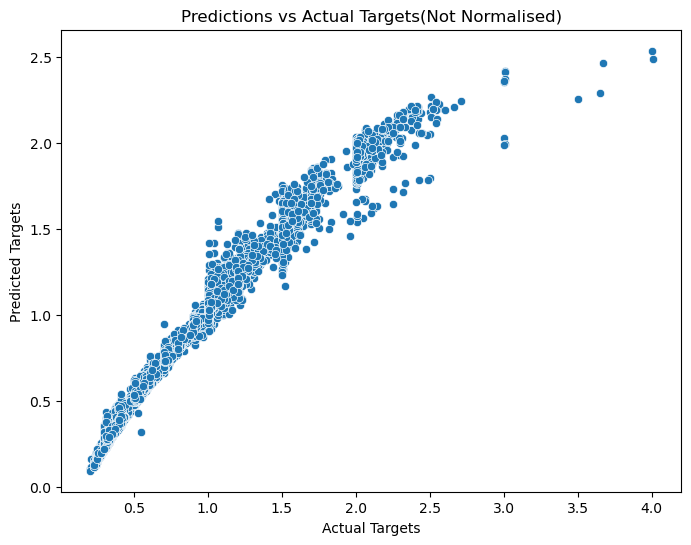

In [301]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_not_normalised.flatten(), y=y_pred_not_normalised.flatten())
plt.xlabel("Actual Targets")
plt.ylabel("Predicted Targets")
plt.title("Predictions vs Actual Targets(Not Normalised)")
plt.show()

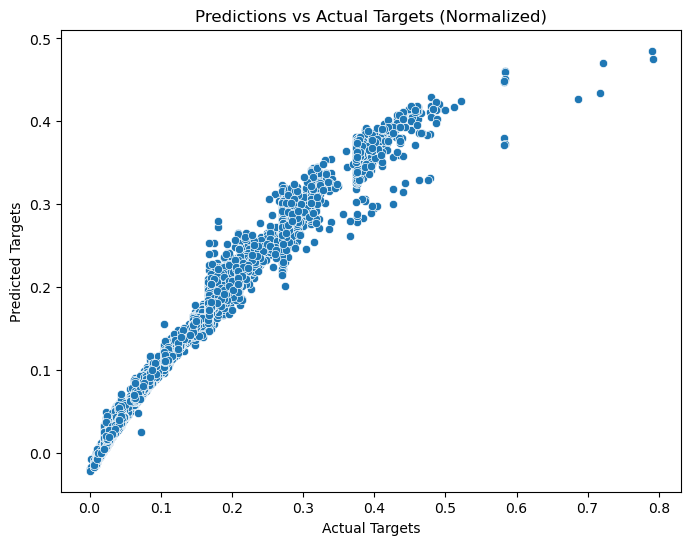

In [302]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.flatten(), y=y_pred.flatten())
plt.xlabel("Actual Targets")
plt.ylabel("Predicted Targets")
plt.title("Predictions vs Actual Targets (Normalized)")
plt.show()

In [303]:
lambda_assumed = 0.1
w_ridge = np.linalg.inv(X_train.T @ X_train + lambda_assumed * np.identity(X_train.shape[1])) @ X_train.T @ y_train
y_pred_ridge = X_test@w_ridge

mse_ridge = np.mean((y_test - y_pred_ridge)**2)

regularization = 0.5 * lambda_assumed * (w_ridge.T@w_ridge)
regularization_loss = mse_ridge/2 + regularization

In [311]:
with open('chanduch_jdonepud _assignment1_part4.pickle', 'wb') as f:
    pickle.dump(w_ridge, f)

In [304]:
y_pred_ridge_not_normalised = y_pred* (5.01-0.2) + 0.2

In [305]:
mse_ridge

0.00025142530755485203

In [306]:
regularization_loss

array([[0.01119109]])

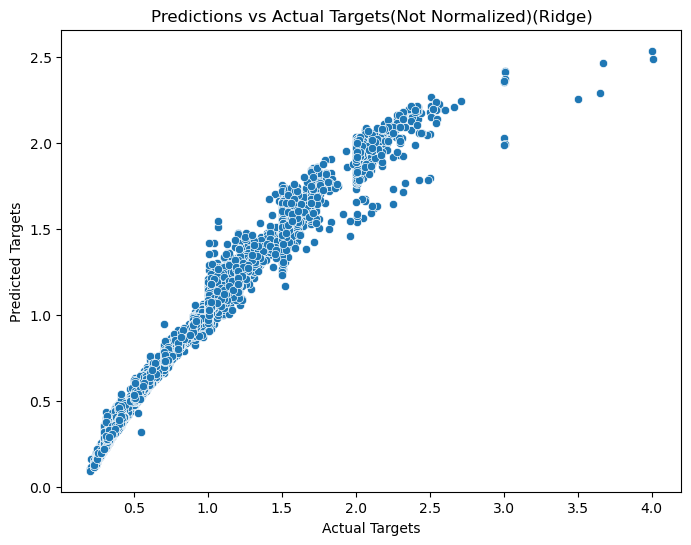

In [307]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_not_normalised.flatten(), y=y_pred_ridge_not_normalised.flatten())
plt.xlabel("Actual Targets")
plt.ylabel("Predicted Targets")
plt.title("Predictions vs Actual Targets(Not Normalized)(Ridge)")
plt.show()

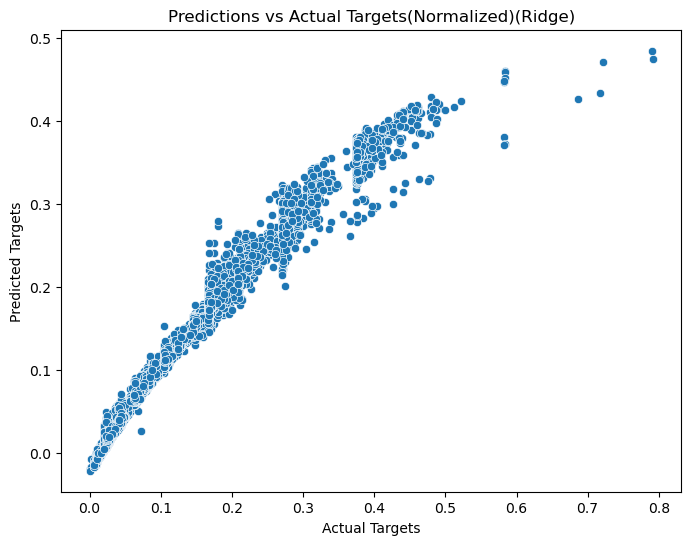

In [308]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.flatten(), y=y_pred_ridge.flatten())
plt.xlabel("Actual Targets")
plt.ylabel("Predicted Targets")
plt.title("Predictions vs Actual Targets(Normalized)(Ridge)")
plt.show()

### Elastic Net Regularization

In [333]:
lambda_L1 = 0.05
lambda_L2 = 0.05
learning_rate = 0.01
iterations = 1000

w_elastic = np.zeros(X_train.shape[1]).reshape(-1,1)

for i in range(iterations):
    predictions = X_train@(w_elastic).reshape(-1,1)
    error = np.subtract(predictions, y_train)
    
    gradient = (X_train.T@(error) / len(y_train)) + (lambda_L1 * w_elastic) + (lambda_L2 * np.sign(w_elastic))
    
    w_elastic -= learning_rate * gradient
    
y_pred_elastic = X_test@(w_elastic)

mse_elastic = np.mean((y_test - y_pred_elastic)**2)

In [334]:
mse_elastic

0.012951886955190763